In [20]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect('IMDB.sqlite')

# see why using two inner join not runing
data = pd.read_sql_query('(Select * from IMDB inner join earning on IMDB.Movie_id = earning.Movie_id) inner join genre on earning.Movie_id=genre.Movie_id',db)

# data = pd.read_sql_query('Select * from genre join earning using(Movie_id)',db)

data['Total'] = data['Domestic'] + data['Worldwide']
data['Total'].replace("",0,inplace=True)
data['Total'].unique()

data["genre"].replace('',np.NaN,inplace=True)
data.dropna(subset = ["genre"],inplace=True)

grouped_sum = data.groupby("genre")["Total"].sum()

for i in range(len(grouped_sum)):
    percentage=grouped_sum.values[i]/(sum(grouped_sum))*100
    print(grouped_sum.index[i],format(percentage,".2f"))

plt.pie(grouped_sum,labels=grouped_sum.index,autopct="%.2f")
plt.show()
data

DatabaseError: Execution failed on sql '(Select * from IMDB inner join earning on IMDB.Movie_id = earning.Movie_id) inner join genre on earning.Movie_id=genre.Movie_id': near "(": syntax error

/tmp/ipykernel_74180/1374739683.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(grouped_sum.index[i],format(percent[i],".2f"))


Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


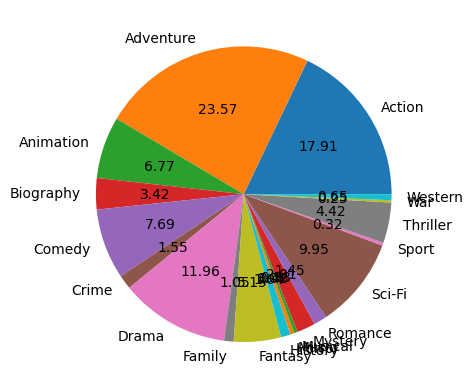

In [5]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt


db = sqlite3.connect('IMDB.sqlite')

data = pd.read_sql_query('Select * from genre join earning using(Movie_id)',db)

data['Total'] = data["Domestic"] + data["Worldwide"]
data['Total'].unique()
data["genre"].replace("",np.NaN,inplace=True)
data.dropna(subset=["genre"],inplace=True)

grouped_sum=data.groupby("genre")['Total'].sum()

percent = np.true_divide(grouped_sum,grouped_sum.sum())*100
for i in range(len(grouped_sum)):
    print(grouped_sum.index[i],format(percent[i],".2f"))

plt.pie(grouped_sum,labels=grouped_sum.index,autopct="%.2f")
plt.show()